# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys_isoto import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


605

In [3]:
# We need Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}units={units}&appid={api_key}&q="

In [4]:
print(query_url)
#country
#dt
#clouds
#speed
#temp_max
#humidity
#lat
#lon

http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=8c075813bfc9022369cf725c0e32018d&q=


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#set up lists to hold info
Cities = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#loop through the list of cities and perform a request for dat on each
print("Beginning Data Retreival")
print("----------------------------")
for city in cities:
    try: 
        print(f"Processing Record | {city}")
        response = requests.get(query_url + city).json()
        Cities.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["sys"]["sunset"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
    except (KeyError):
        print("City not found. Skipping...")
    print("----------------------------")

Beginning Data Retreival
----------------------------
Processing Record | ancud
----------------------------
Processing Record | hermanus
----------------------------
Processing Record | cape town
----------------------------
Processing Record | georgetown
----------------------------
Processing Record | golden rock
City not found. Skipping...
----------------------------
Processing Record | sovetskiy
----------------------------
Processing Record | znamenskoye
----------------------------
Processing Record | new norfolk
----------------------------
Processing Record | busselton
----------------------------
Processing Record | tiksi
----------------------------
Processing Record | santa maria
----------------------------
Processing Record | praia
----------------------------
Processing Record | port alfred
----------------------------
Processing Record | atuona
----------------------------
Processing Record | vuktyl
----------------------------
Processing Record | taoudenni
-----------

----------------------------
Processing Record | leh
----------------------------
Processing Record | tasiilaq
----------------------------
Processing Record | katsuura
----------------------------
Processing Record | crixas
----------------------------
Processing Record | robertsport
----------------------------
Processing Record | manvi
----------------------------
Processing Record | mayskiy
----------------------------
Processing Record | wad madani
City not found. Skipping...
----------------------------
Processing Record | vanino
----------------------------
Processing Record | chivolo
----------------------------
Processing Record | tonj
City not found. Skipping...
----------------------------
Processing Record | aykhal
----------------------------
Processing Record | kloulklubed
----------------------------
Processing Record | iralaya
----------------------------
Processing Record | nizhneyansk
City not found. Skipping...
----------------------------
Processing Record | ngukurr

----------------------------
Processing Record | port lincoln
----------------------------
Processing Record | asau
City not found. Skipping...
----------------------------
Processing Record | faanui
----------------------------
Processing Record | bintulu
----------------------------
Processing Record | puerto narino
----------------------------
Processing Record | turukhansk
----------------------------
Processing Record | barrow
----------------------------
Processing Record | vila franca do campo
----------------------------
Processing Record | rogers
----------------------------
Processing Record | bengkulu
City not found. Skipping...
----------------------------
Processing Record | talara
----------------------------
Processing Record | kamaishi
----------------------------
Processing Record | hutchinson
----------------------------
Processing Record | bela
----------------------------
Processing Record | ishim
----------------------------
Processing Record | klaksvik
-----------

----------------------------
Processing Record | penzance
----------------------------
Processing Record | los llanos de aridane
----------------------------
Processing Record | haines junction
----------------------------
Processing Record | torbay
----------------------------
Processing Record | camacha
----------------------------
Processing Record | ozernovskiy
----------------------------
Processing Record | mahaicony
City not found. Skipping...
----------------------------
Processing Record | itarema
----------------------------
Processing Record | jaciara
----------------------------
Processing Record | tarudant
City not found. Skipping...
----------------------------
Processing Record | teeli
----------------------------
Processing Record | saint-leu
----------------------------
Processing Record | phalombe
----------------------------
Processing Record | kazalinsk
City not found. Skipping...
----------------------------
Processing Record | tiznit
----------------------------
P

----------------------------
Processing Record | inhambane
----------------------------
Processing Record | rocha
----------------------------
Processing Record | talnakh
----------------------------
Processing Record | uruacu
----------------------------
Processing Record | arkadak
----------------------------
Processing Record | rach gia
----------------------------
Processing Record | bambous virieux
----------------------------
Processing Record | vallenar
----------------------------
Processing Record | luba
----------------------------
Processing Record | acarau
City not found. Skipping...
----------------------------
Processing Record | burica
City not found. Skipping...
----------------------------
Processing Record | korcula
----------------------------
Processing Record | louisbourg
City not found. Skipping...
----------------------------
Processing Record | azimur
City not found. Skipping...
----------------------------
Processing Record | hobyo
----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": Cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity, 
    "Lat": lat, 
    "Lng": lng, 
    "Max Temp": max_temp, 
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ancud,75,CL,1563918605,100,-41.87,-73.83,33.80,2.91
1,Hermanus,96,ZA,1563897332,92,-34.42,19.24,55.00,18.01
2,Cape Town,75,ZA,1563897592,87,-33.93,18.42,55.99,28.86
3,Georgetown,20,GY,1563919951,100,6.80,-58.16,75.20,2.24
4,Sovetskiy,15,RU,1563902193,94,56.76,48.47,55.12,6.76


In [7]:
weather_data.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [8]:
weather_data.to_csv("Weather_Data_isoto.csv") 

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ancud,75,CL,1563918605,100,-41.87,-73.83,33.80,2.91
1,Hermanus,96,ZA,1563897332,92,-34.42,19.24,55.00,18.01
2,Cape Town,75,ZA,1563897592,87,-33.93,18.42,55.99,28.86
3,Georgetown,20,GY,1563919951,100,6.80,-58.16,75.20,2.24
4,Sovetskiy,15,RU,1563902193,94,56.76,48.47,55.12,6.76


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

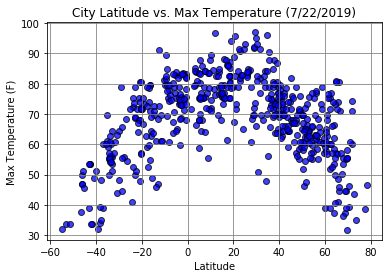

In [13]:
plt.rc('grid', linestyle = "-", color = "gray")
lat_temp = plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker = "o", facecolors = "b", 
                       edgecolors = "black", alpha = 0.75)
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (7/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Lat_vs_Temp")

#### Latitude vs. Humidity Plot

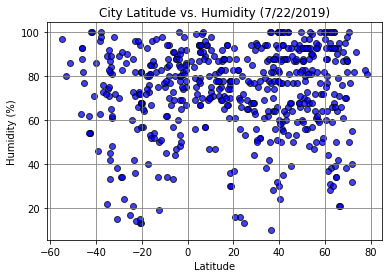

In [14]:
plt.rc('grid', linestyle = "-", color = "gray")
lat_humid = plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker = "o", facecolors = "b", 
                       edgecolors = "black", alpha = 0.75)
plt.grid(True)
plt.title("City Latitude vs. Humidity (7/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Lat_vs_Humid")

#### Latitude vs. Cloudiness Plot

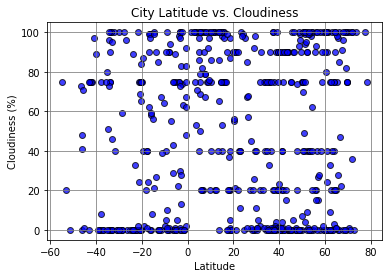

In [11]:
plt.rc('grid', linestyle = "-", color = "gray")
lat_cloudy = plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker = "o", facecolors = "b", 
                       edgecolors = "black", alpha = 0.75)
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (7/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Lat_vs_Cloud")

#### Latitude vs. Wind Speed Plot

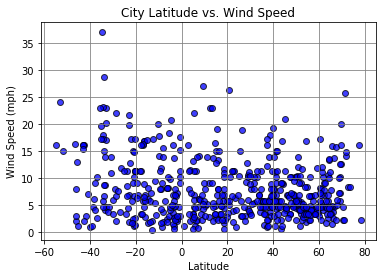

In [12]:
plt.rc('grid', linestyle = "-", color = "gray")
lat_wind = plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker = "o", facecolors = "b", 
                       edgecolors = "black", alpha = 0.75)
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (7/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Lat_vs_WindSpeed")